In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test = pd.read_csv('fashion-mnist_test.csv')

In [4]:
fashion_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
fashion_train.shape

(60000, 785)

In [7]:
trainset = np.array(fashion_train)

In [8]:
testset = np.array(fashion_test)

In [9]:
trainset

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

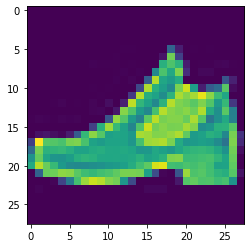

In [11]:
plt.imshow(trainset[1,1:].reshape(28,28))

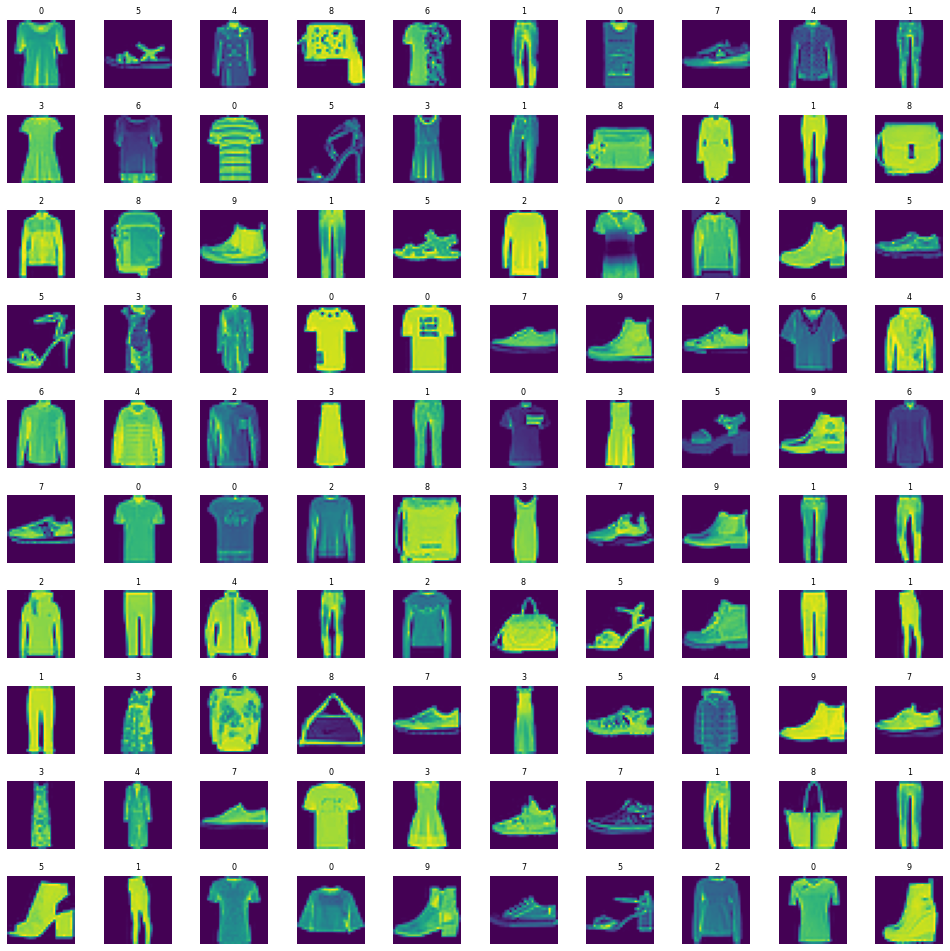

In [12]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(trainset) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( trainset[index,1:].reshape((28,28)) )
    axes[i].set_title(trainset[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [13]:
trainset


array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(trainset[:,1:])
y_train = trainset[:,0]

In [15]:
y_train

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [16]:
X_train

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

In [17]:
X_test = scaler.transform(testset[:,1:])
y_test = testset[:,0]

In [18]:
X_test

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
         0.0154414 , -0.03304557],
       [-0.00950488,  3.66723055,  2.4254542 , ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
X_train = X_train.reshape(48000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_val = X_val.reshape(12000,28,28,1)

In [22]:
import keras

Using TensorFlow backend.
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\david\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, 3, 3, input_shape=(28,28,1), activation='relu'))

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [26]:
model.add(MaxPool2D(pool_size=(2,2)))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(output_dim = 32, activation= 'relu'))

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [29]:
model.add(Dense(output_dim = 10, activation= 'sigmoid'))

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [30]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [33]:
epochs = 20

In [34]:
model.fit(X_train,
            y_train,
            batch_size = 512,
            nb_epoch = epochs,
            verbose = 1,
            validation_data = (X_val, y_val))

C:\Users\david\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 22s 456us/step - loss: 0.3870 - accuracy: 0.8641 - val_loss: 0.3607 - val_accuracy: 0.8742
Epoch 2/20
48000/48000 [==============================] - 21s 440us/step - loss: 0.3408 - accuracy: 0.8805 - val_loss: 0.3412 - val_accuracy: 0.8769
Epoch 3/20
48000/48000 [==============================] - 21s 436us/step - loss: 0.3133 - accuracy: 0.8900 - val_loss: 0.3305 - val_accuracy: 0.8836
Epoch 4/20
48000/48000 [==============================] - 22s 450us/step - loss: 0.3013 - accuracy: 0.8940 - val_loss: 0.3143 - val_accuracy: 0.8873
Epoch 5/20
48000/48000 [==============================] - 23s 479us/step - loss: 0.2828 - accuracy: 0.8999 - val_loss: 0.2992 - val_accuracy: 0.8923
Epoch 6/20
48000/48000 [==============================] - 20s 416us/step - loss: 0.2647 - accuracy: 0.9070 - val_loss: 0.3089 - val_accuracy: 0.8923
Epoch 7/20
48000/48000 [==============================] 

In [35]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 311us/step


[0.2906632892012596, 0.9009000062942505]

In [38]:
class_pred = model.predict_classes(X_test)
class_pred

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
cm = confusion_matrix(y_test,class_pred)
cm

array([[839,   0,   8,  39,   7,   0, 102,   0,   5,   0],
       [  1, 976,   1,  16,   2,   1,   3,   0,   0,   0],
       [ 10,   1, 723,  20, 106,   0, 139,   0,   1,   0],
       [  8,   5,   2, 942,  18,   0,  25,   0,   0,   0],
       [  0,   0,  17,  28, 902,   0,  52,   0,   1,   0],
       [  0,   1,   0,   0,   0, 969,   1,  16,   1,  12],
       [ 98,   0,  20,  39,  71,   0, 767,   0,   5,   0],
       [  0,   0,   0,   0,   0,  17,   0, 935,   1,  47],
       [  3,   0,   3,   4,   2,   3,   4,   1, 980,   0],
       [  0,   0,   0,   0,   0,   6,   0,  18,   0, 976]], dtype=int64)

In [41]:
print(classification_report(y_test,class_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.93      0.72      0.82      1000
           3       0.87      0.94      0.90      1000
           4       0.81      0.90      0.86      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.77      0.73      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<AxesSubplot:>

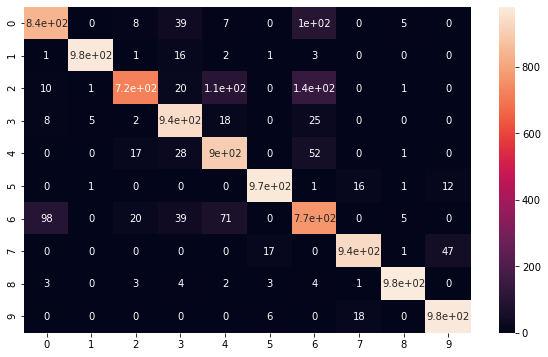

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)